# Supervised UMAP to differentiate DN vs controls
The pipeline allows user to define a frequency frequency of peptides. Here we examplify it with threshold=$30\%$.
### Input files
* `dn_control_test_train.csv` peptidomic data of 800 DN (diabetic nephropathy) patients and healthy controls
### pipeline
* `umap_pipeline.py` for supervised UMAP
* `helper.py` for scatter plot of embedded data
### Steps
1. Peptide intensities (X) and diagnosis (Y) are fitted to the pipeline 
2. A frequency threshold of $30\%$ was applied to Peptide
3. The data were splitted into train ($70\%$) and test $50\%$
4. A SVM was trained to select the best UMAP parameters for maximum separation. The default cross validation is 5.
5. The Trained pipeline was applied to test data
6. The embedded test data were plotted in 2-dimension
### Conclusion
The accuracy and separation is improved compared to unsupervised UMAP

In [1]:
import pandas as pd
import numpy as np

from set_path import *
from helper import plot_points
import umap_pipeline

In [2]:
df1=pd.read_csv(f2+'dn_control_test_train.csv',index_col=0)
X=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [ ]:
pline=umap_pipeline.pline(freq_thres=0.3)
pline.load_data(X,y)
pline.logX()
pline.train_test_split(train_size=0.7)

In [9]:
pline.pipeline_fit()

6)	0.27635133
  (112, 152)	0.27338123
  (112, 167)	0.27560183
  (112, 177)	0.28158674
  (112, 181)	0.27558792
  (112, 192)	0.2737919
  (112, 231)	0.29874524
  (112, 287)	0.27430198
  (112, 291)	0.28221172
  (112, 349)	0.28872627
  (112, 368)	0.27469975
  (112, 416)	0.2728418
  (112, 432)	0.2946769
  (112, 438)	0.27239817
inside function
   (0, 112)	0.27061597
  (0, 122)	0.30392554
  (0, 143)	0.26948696
  (0, 162)	0.28012097
  (0, 209)	0.28627452
  (0, 243)	0.27247387
  (0, 316)	0.31717852
  (0, 340)	0.282244
  (0, 372)	0.27728045
  (0, 380)	0.2689369
  (0, 397)	0.2694096
  (0, 398)	0.27394056
  (0, 433)	0.27000377
  (0, 436)	0.26940492
  (0, 443)	0.31278086
  (1, 16)	0.27152687
  (1, 109)	0.2739063
  (1, 122)	0.28432605
  (1, 131)	0.27347192
  (1, 162)	0.27215436
  (1, 210)	0.28630817
  (1, 230)	0.27576923
  (1, 237)	0.274025
  (1, 316)	0.3057792
  (1, 331)	0.27742314
  :	:
  (111, 250)	0.30243912
  (111, 265)	0.27499574
  (111, 294)	0.27234685
  (111, 328)	0.27972773
  (111, 337)	0.27

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('umap',
                                        UMAP(dens_frac=0.0, dens_lambda=0.0,
                                             random_state=456)),
                                       ('svc', SVC())]),
             param_grid={'umap__min_dist': [0.001, 0.01, 0.1, 0.5],
                         'umap__n_neighbors': [5, 15, 25, 35, 45]})

In [10]:
pline.get_accuracy()

Accuracy on the train set with UMAP transformation: 0.989
inside function
   (0, 60)	0.58654547
  (0, 75)	0.57422245
  (0, 78)	0.59395236
  (0, 418)	0.60088795
  (0, 429)	0.5672055
  (1, 216)	0.5783823
  (1, 269)	0.5821028
  (1, 282)	0.5862294
  (1, 445)	0.5820831
  (1, 477)	0.5793549
  (2, 127)	0.5774689
  (2, 143)	0.6651959
  (2, 286)	0.58312327
  (2, 507)	0.5831713
  (2, 561)	0.5781649
  (3, 13)	0.5812726
  (3, 31)	0.5876221
  (3, 106)	0.5901234
  (3, 407)	0.5761459
  (3, 561)	0.5768869
  (4, 89)	0.6113021
  (4, 185)	0.57908845
  (4, 305)	0.58251846
  (4, 361)	0.57883537
  (4, 437)	0.58148795
  :	:
  (237, 23)	0.5947557
  (237, 59)	0.581055
  (237, 162)	0.583747
  (237, 171)	0.5814611
  (237, 213)	0.5756729
  (238, 70)	0.5891591
  (238, 210)	0.5801471
  (238, 231)	0.5819438
  (238, 287)	0.5766012
  (238, 431)	0.5832305
  (239, 89)	0.5773812
  (239, 185)	0.5881921
  (239, 336)	0.57963634
  (239, 430)	0.576712
  (239, 437)	0.59347177
  (240, 109)	0.5852002
  (240, 110)	0.57135445
  (2

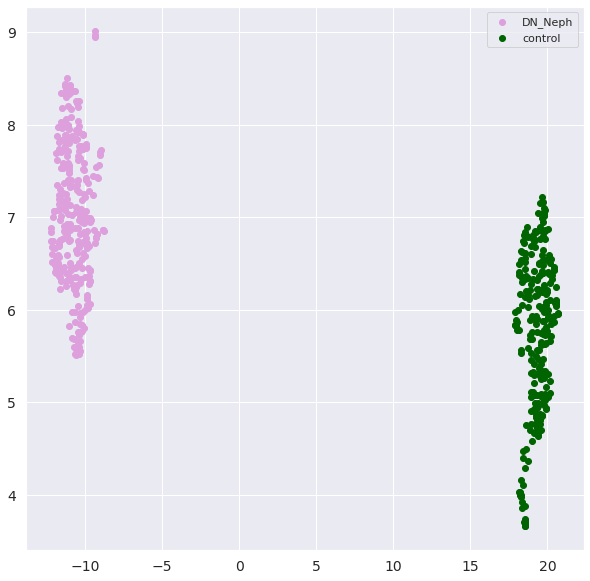

In [36]:
pline.get_plot(on='train',legend='box')

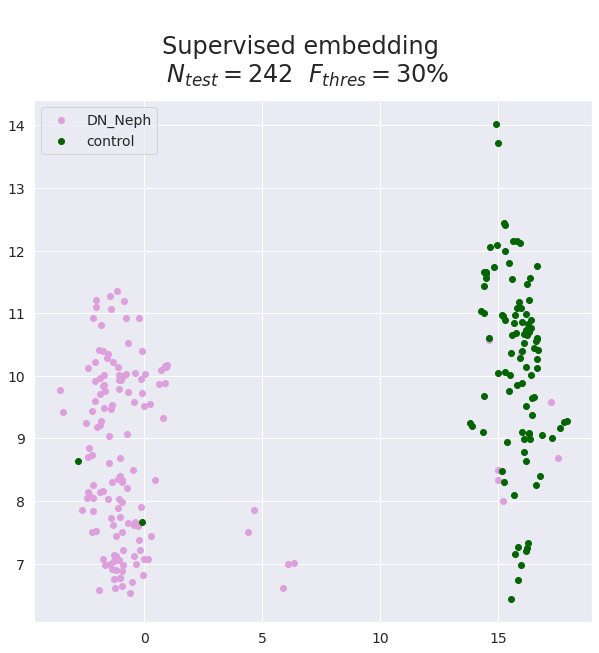

In [11]:
pline.get_plot(on='test',legend='box',figout=f3+'supervised_dn_f30.tiff')